In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [3]:
df =pd.read_csv('./WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


We can remove the ID column as it is non predictive attribute

In [ ]:
del df['Id']

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **Exploratory analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Let us start with exploring our target variable 'quality'

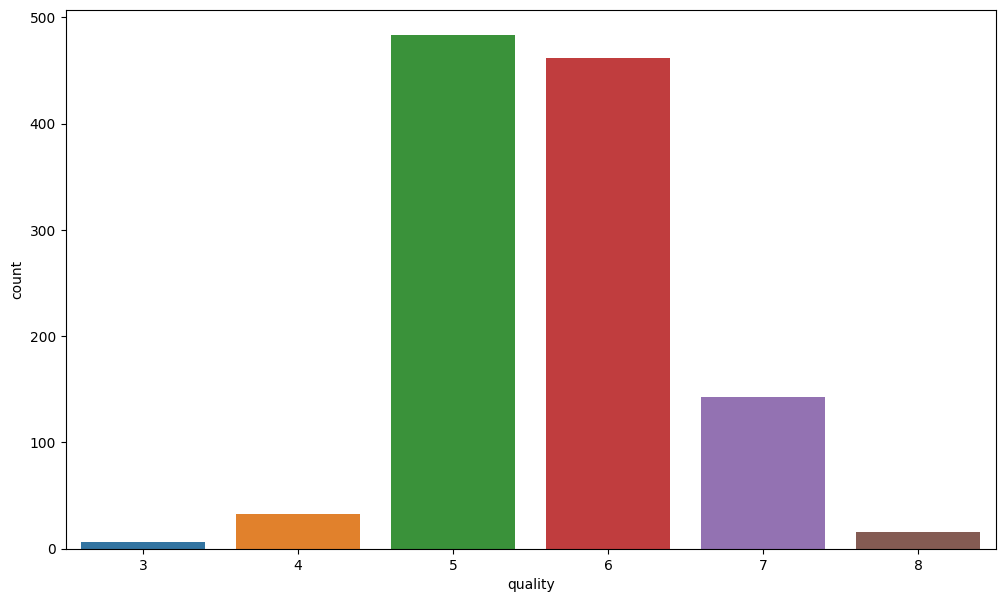

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='quality',data=df)
plt.show()

Lots of wine have quality category 5 and 6

### Correlation of dataset is given below

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


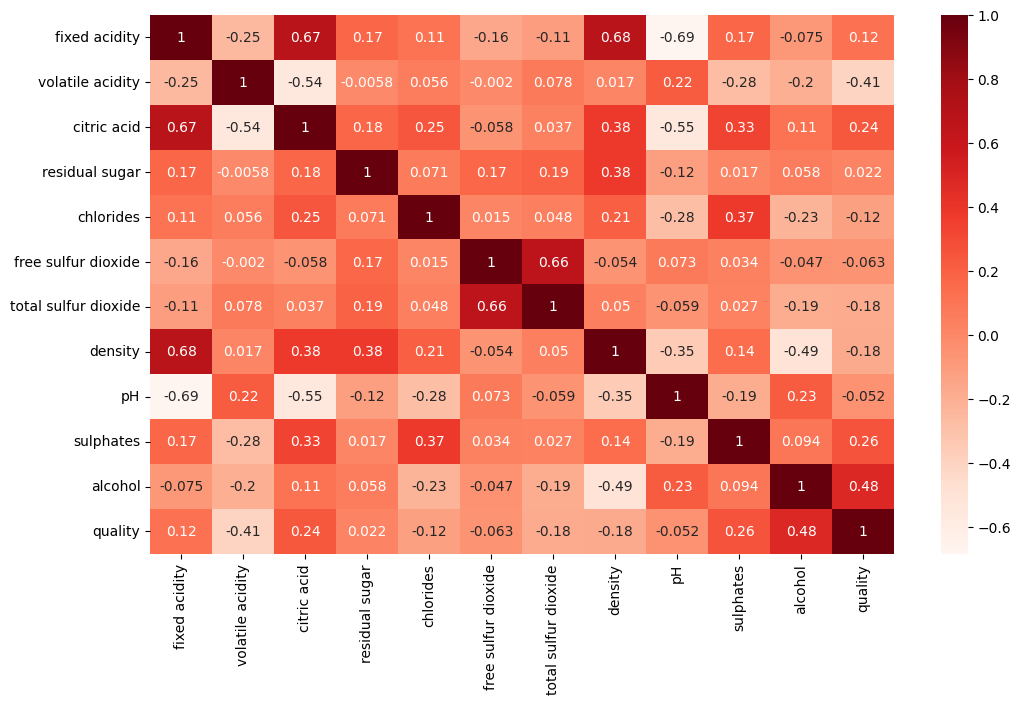

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

### Plot b/w total sulphur dioxide and free sulphur dioxide

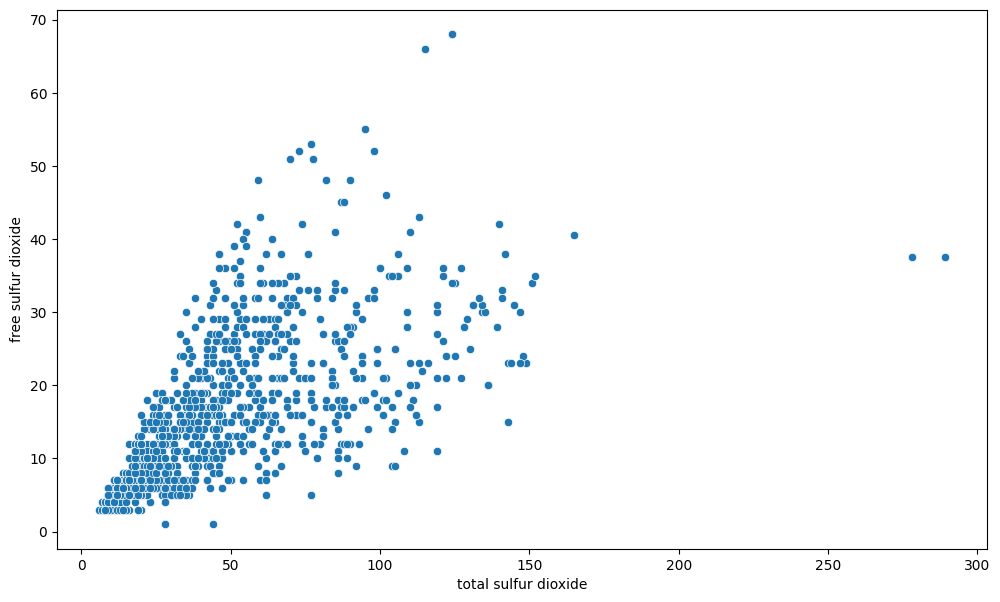

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

### Quality of wine varies b/w 3-8,and the below plot give information about how the quality changes with respect to  volatile acidity

### The below plot explians in detail about how the density of wine varies with the fixed acidity

<Axes: xlabel='density', ylabel='fixed acidity'>

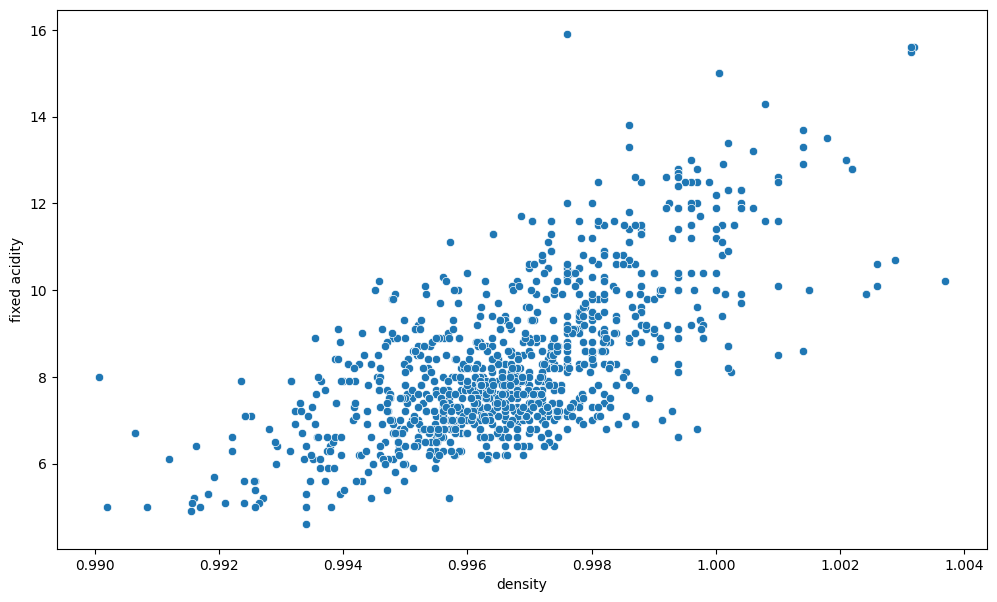

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

### The below plot explains about how volatile acidity of wine changes with respect to citric acid  

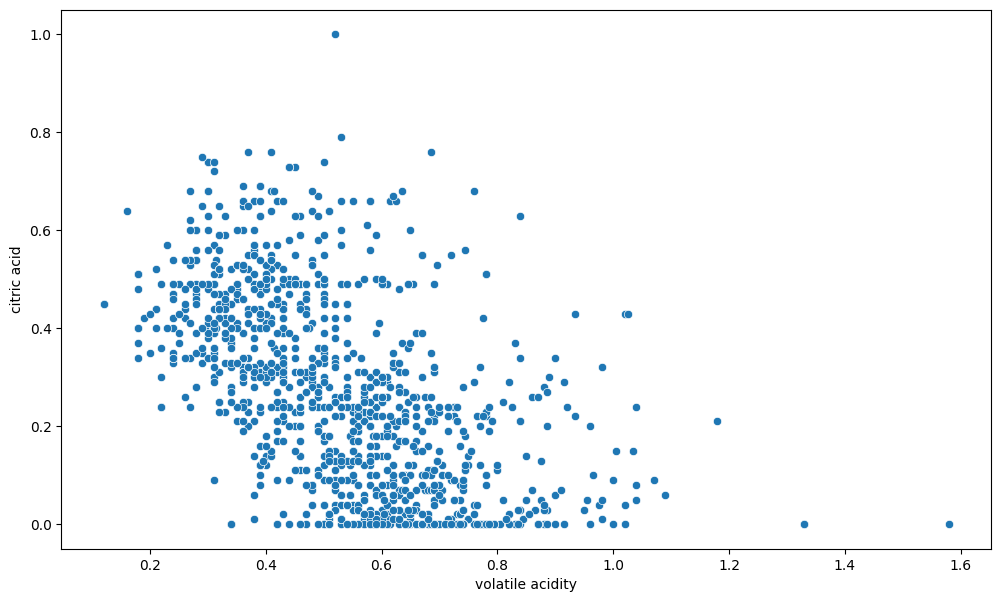

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

### The below plot explains how quality of wine varies in according to sulphates in it

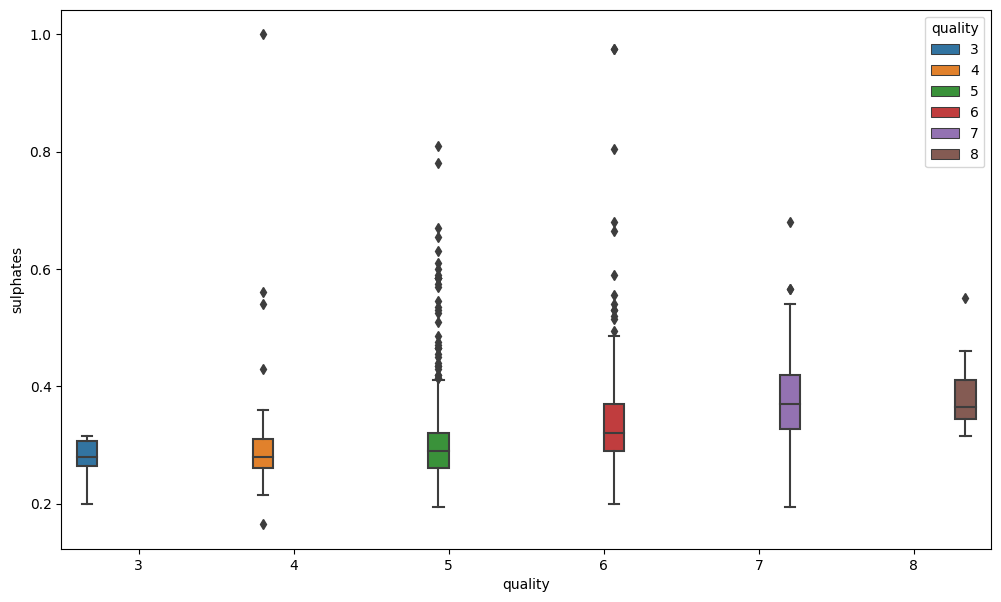

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='sulphates',data=df,hue='quality')
plt.show()

### The below plot describes about citric acid and volatile acidity

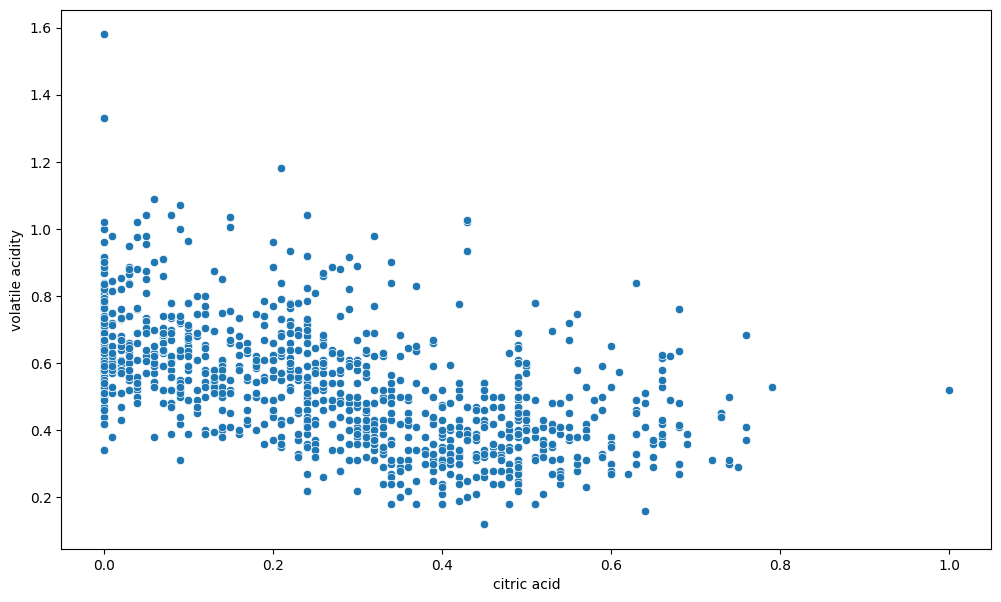

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

### Data Preprocessing (standardisation)

In [ ]:
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()

### Splitting the dataset as 20% for testing and 80% for training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X =np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
y =np.array(df['quality'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Preparing for Models

In [ ]:
model_comp={}

### 1.Logistic Regression

In [ ]:
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
y1=lgr.predict(X_test)
print(accuracy_score(y_test,y1))
print(f1_score(y_test,y1,average='weighted'))
print(classification_report(y_test,y1))

model_comp['logistic regression']=[accuracy_score(y1,y_test),f1_score(y_test,y1,average='weighted')]

0.5768025078369906
0.5543240783482672
              precision    recall  f1-score   support

           3       0.71      0.92      0.80       156
           4       0.49      0.45      0.47       157
           5       0.55      0.54      0.54       168
           6       0.46      0.24      0.32       166
           7       0.54      0.47      0.50       159
           8       0.61      0.87      0.71       151

    accuracy                           0.58       957
   macro avg       0.56      0.58      0.56       957
weighted avg       0.56      0.58      0.55       957



### 2. Decision Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y2=dt.predict(X_test)

print(accuracy_score(y_test,y2))
print(f1_score(y_test,y2,average='weighted'))
print(classification_report(y_test,y2))

model_comp['decision tree']=[accuracy_score(y2,y_test),f1_score(y_test,y2,average='weighted')]

0.7722048066875653
0.7678745853518884
              precision    recall  f1-score   support

           3       0.93      0.97      0.95       156
           4       0.79      0.80      0.79       157
           5       0.63      0.59      0.61       168
           6       0.59      0.52      0.55       166
           7       0.77      0.87      0.82       159
           8       0.92      0.92      0.92       151

    accuracy                           0.77       957
   macro avg       0.77      0.78      0.77       957
weighted avg       0.77      0.77      0.77       957



###  3 RandomForest

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y3=rf.predict(X_test)

print(accuracy_score(y_test,y3))
print(f1_score(y_test,y3,average='weighted'))
print(classification_report(y_test,y3))


model_comp['Random forest']=[accuracy_score(y3,y_test),f1_score(y_test,y3,average='weighted')]

0.6550218340611353
0.638523109199476
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.76      0.73       100
           6       0.60      0.66      0.63        92
           7       0.65      0.48      0.55        27
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.33      0.32      0.32       229
weighted avg       0.63      0.66      0.64       229



### 4 KNN

In [ ]:
k=KNeighborsClassifier()
k.fit(X_train,y_train)
y4=k.predict(X_test)

print(accuracy_score(y_test,y4))
print(f1_score(y_test,y4,average='weighted'))
print(classification_report(y_test,y4))

model_comp['KNN']=[accuracy_score(y4,y_test),f1_score(y_test,y4,average='weighted')]

0.5589519650655022
0.5395476430410928
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.69      0.66       100
           6       0.51      0.58      0.54        92
           7       0.33      0.22      0.27        27
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.25      0.25      0.25       229
weighted avg       0.53      0.56      0.54       229



#Feature Engineering

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [ ]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(df.drop(["quality"],axis=1),df["quality"])

In [ ]:
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846


#Classification

In [ ]:
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
y1=lgr.predict(X_test)

print(accuracy_score(y_test,y1))
print(f1_score(y_test,y1,average='weighted'))
print(classification_report(y_test,y1))

model_comp['logistic regression']=[accuracy_score(y1,y_test),f1_score(y_test,y1,average='weighted')]

0.6375545851528385
0.5818306114188381
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.82      0.75       100
           6       0.58      0.70      0.63        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.21      0.25      0.23       229
weighted avg       0.54      0.64      0.58       229



In [ ]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y2=dt.predict(X_test)

print(accuracy_score(y_test,y2))
print(f1_score(y_test,y2,average='weighted'))
print(classification_report(y_test,y2))

model_comp['decision tree']=[accuracy_score(y2,y_test),f1_score(y_test,y2,average='weighted')]

0.7795193312434692
0.7746413765825988
              precision    recall  f1-score   support

           3       0.94      0.97      0.96       156
           4       0.80      0.80      0.80       157
           5       0.64      0.64      0.64       168
           6       0.61      0.50      0.55       166
           7       0.77      0.86      0.81       159
           8       0.91      0.95      0.93       151

    accuracy                           0.78       957
   macro avg       0.78      0.79      0.78       957
weighted avg       0.77      0.78      0.77       957



In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y3=rf.predict(X_test)

print(accuracy_score(y_test,y3))
print(f1_score(y_test,y3,average='weighted'))
print(classification_report(y_test,y3))

model_comp['Random forest']=[accuracy_score(y3,y_test),f1_score(y_test,y3,average='weighted')]

0.8766980146290491
0.8722324753794438
              precision    recall  f1-score   support

           3       0.97      1.00      0.99       156
           4       0.93      0.98      0.95       157
           5       0.78      0.76      0.77       168
           6       0.74      0.61      0.67       166
           7       0.85      0.94      0.89       159
           8       0.96      1.00      0.98       151

    accuracy                           0.88       957
   macro avg       0.87      0.88      0.88       957
weighted avg       0.87      0.88      0.87       957

